In [1]:
!pip install tqdm --quiet

In [2]:
import pandas as pd

df = pd.read_parquet("hf://datasets/crossingminds/shopping-queries-image-dataset/data/product_image_urls.parquet")
df_1000 = df.dropna().sample(1000,random_state=42)

In [3]:
import os
import pandas as pd
import requests
from tqdm.auto import tqdm
from urllib.parse import urlparse

save_dir = "images"
os.makedirs(save_dir, exist_ok=True)

# Helper to download one image
def download_image(pid, url):
    try:
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()
        ext = os.path.splitext(urlparse(url).path)[1] or ".jpg"
        fname = f"{pid}{ext}"
        with open(os.path.join(save_dir, fname), "wb") as f:
            f.write(resp.content)
        return True
    except:
        return False

success = failed = 0
for _, row in tqdm(df_1000.iterrows(), total=len(df_1000), desc="Downloading images"):
    pid, url = row["product_id"], row["image_url"]
    if pd.isna(url) or not url.startswith("http"):
        failed += 1
        continue
    if download_image(pid, url):
        success += 1
    else:
        failed += 1

print(f" Done — {success} downloaded, {failed} failed/skipped.")


 Done — 1000 downloaded, 0 failed/skipped.


(1174, 425, 3)


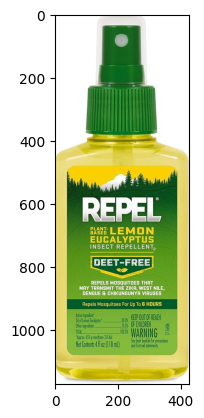

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/kaggle/working/images/B004N59OFU.jpg')
print(np.array(img).shape)
plt.imshow(img)
plt.show()